In [37]:
import networkx as nx
import matplotlib.pyplot as plt
import random

# Part 1

In [34]:
G = nx.powerlaw_cluster_graph(200, 5, 0.5, seed=25)

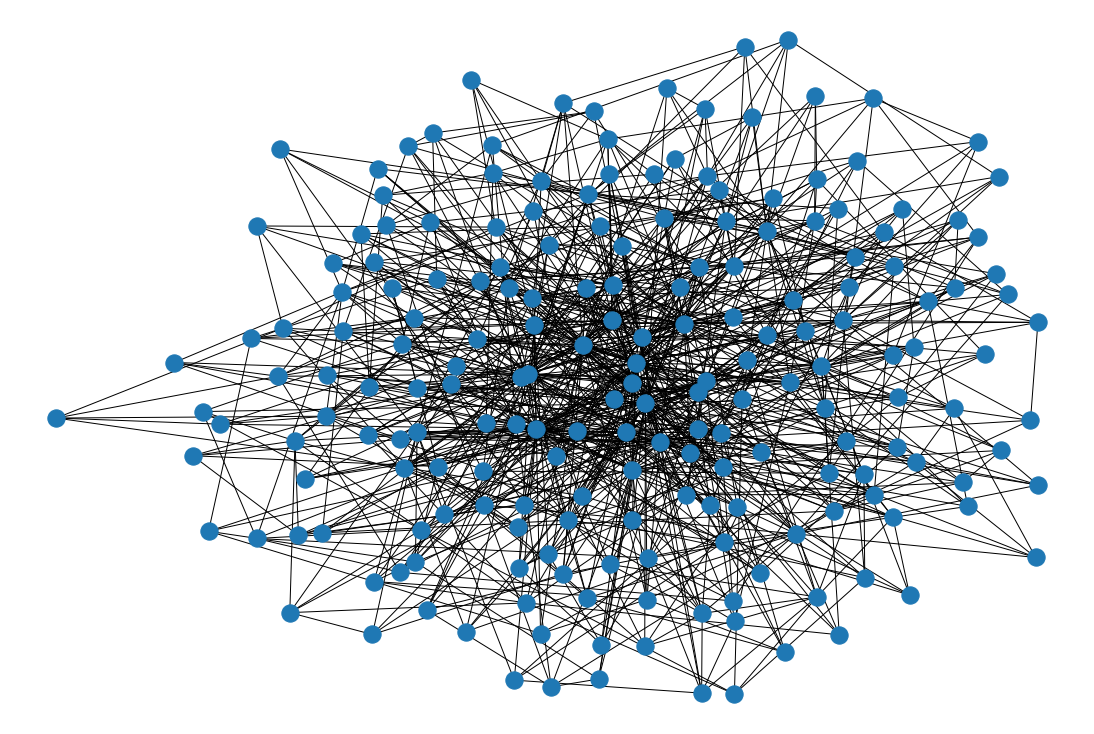

In [35]:
plt.figure( figsize=(15, 10))
nx.draw(G)
plt.show()

perform different types of attack: turn off nodes at random, turn off the highest degree nodes, those with the highest pagerank, those with the highest betweenness, ...

#### Attack-1: Remove node with the highest betweeness

In [32]:
#find node with highest betweenness

betweenness_dict = nx.betweenness_centrality(G)
max_betweenness_node = max(betweenness_dict, key=betweenness_dict.get)  # Just use 'min' instead of 'max' for minimum.
print("Node: ", max_betweenness_node, "- Betweenness Value: ", betweenness_dict[max_betweenness_node])


Node:  3 - Betweenness Value:  0.14371153087198094


In [24]:
##Remove nodes with highest betweenness
G.remove_node(max_betweenness_node)

#### Attack-2: Remove node with the highest degree

In [33]:
degree_dict = dict(G.degree)
max_node_degree = max( degree_dict, key=degree_dict.get)
print("Node: ", max_node_degree, "- Betweenness Value: ", degree_dict[max_node_degree])

Node:  3 - Betweenness Value:  56


In [36]:
G.remove_node(max_node_degree)

#### Attack-3: Remove a node at random

In [38]:
#pick random node
random_node = random.randint(0, nx.number_of_nodes(G)-1)

G.remove_node(random_node)

#### Attack-4: Remove node with the highest pagerank

In [41]:
pageRank_dict = nx.pagerank(G)

max_pageRank_idx = max(pageRank_dict, key=pageRank_dict.get)  # Just use 'min' instead of 'max' for minimum.
print("Node: ", max_pageRank_idx, "- Betweenness Value: ", pageRank_dict[max_pageRank_idx]

{0: 0.010176499601787802, 1: 0.00554780097134739, 2: 0.02064725249242337, 4: 0.023340119871922783, 5: 0.03292509603890042, 6: 0.02309237328208104, 7: 0.022839977203372323, 8: 0.013252674929722872, 9: 0.01363136317925662, 10: 0.009414058965428757, 11: 0.0065941999176162645, 12: 0.010308756832260405, 13: 0.013483541813301494, 14: 0.0047477687599429535, 15: 0.006420128582784752, 16: 0.006674944449326734, 17: 0.005944865021244599, 18: 0.006377570302216244, 19: 0.005167884184746506, 20: 0.008995453003965384, 21: 0.0034849124640606967, 22: 0.0029102121859482495, 23: 0.0039841765810308925, 24: 0.005732271072237814, 25: 0.0034087596725084395, 26: 0.003889758666926786, 27: 0.0034076557416113794, 28: 0.003978972274522971, 29: 0.005263708154910958, 30: 0.004343343722853903, 31: 0.004791674230892082, 32: 0.012480544126224494, 33: 0.012839642886456741, 34: 0.020857718088639367, 35: 0.009155280597187261, 36: 0.00584901185705502, 37: 0.008767384702927128, 38: 0.008359455346620106, 39: 0.0083243621717

# Part 2